##Training and Evaluating a simple DNN network with CNN and FC layers
There are four major steps in successfully training a DNN model.


1. **Forward Pass:** Forward the input data using forward pass (multiply+add/accumulate then send it to associated activation functions)
2.  **Loss Calculation:** Calculate the loss function between original labes vs your model's predicted value
3. **Optimizer:** Optimizers are used to help guide the process of updating the model's parameters to improve its performance.
4. **Backpropagation:** The gradient is then used in backpropagation to update the model's weights and biases



##Import all necessary libraries

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

##Import your open source dataset and normalize your dataset so it does not saturate


In [2]:
#import cifar 10 which means it should have 10 classified/labels of image datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


##Verify the data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

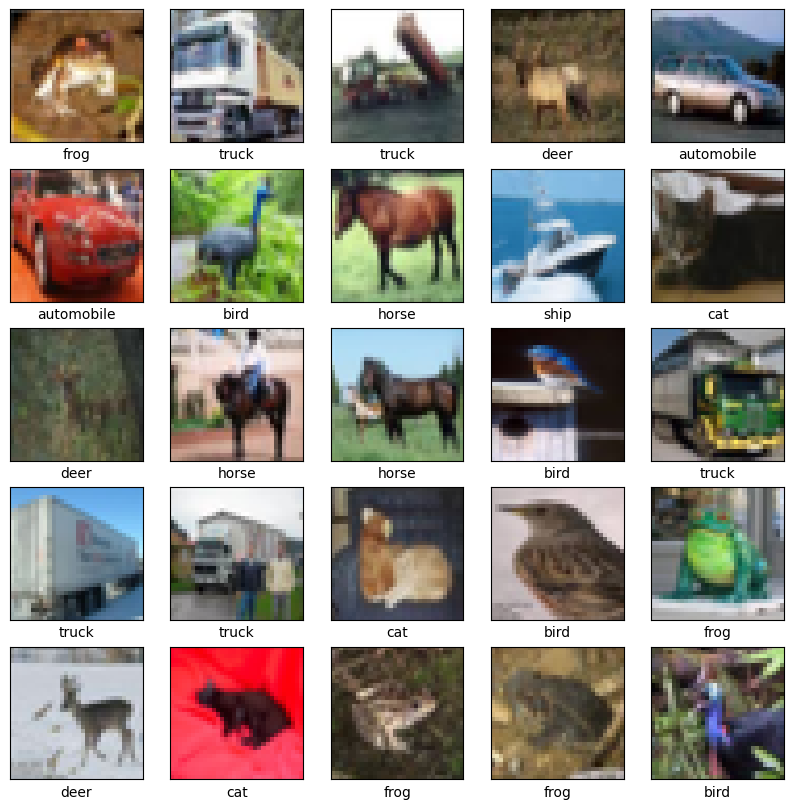

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##Create the convolutional base
The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. Here color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#show your model archiutecture/summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

##Add Dense (Fully Connected) layers on top
To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.


##Compile and train (fit) the model

##ADAM Optimizer
The Adam (Adaptive Moment Estimation) optimizer is widely used in deep learning due to its ability to adapt the learning rate for each parameter dynamically. It combines the advantages of two other optimizers: AdaGrad (which adapts the learning rate for each parameter) and Momentum (which accelerates gradient descent using a moving average of past gradients).

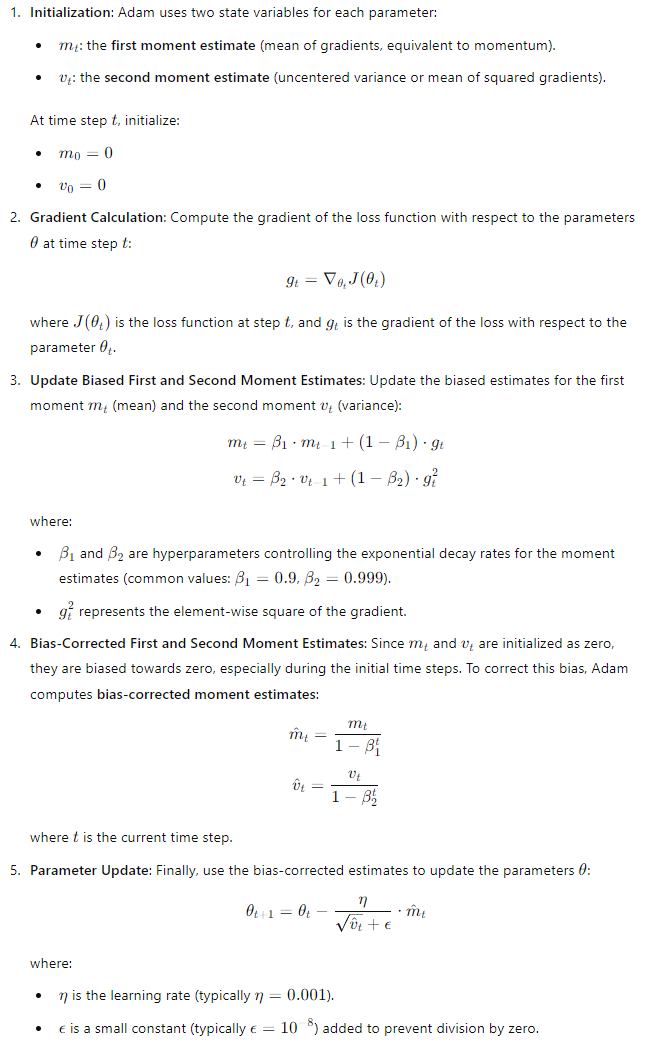

## Sparse Categorical Loss function:
Sparse Categorical Cross Entropy is a loss function used in machine learning, particularly for multi-class classification problems. It is commonly used when the target labels are in the form of integers rather than one-hot encoded vectors. It is a variation of the Categorical Cross Entropy loss function, but it is optimized for cases where the true labels are sparse (i.e., represented as class indices).

1. Categorical Cross Entropy:

It is a loss function used for classification tasks where the goal is to minimize the difference between the predicted probability distribution (output of the model) and the actual distribution (true labels). In categorical cross entropy, the labels are one-hot encoded, meaning for each sample, only one class is 1 (the correct class), and all others are 0.

2. Sparse Categorical Cross Entropy:

In sparse categorical cross entropy, instead of representing the true labels as one-hot encoded vectors, the true label for each sample is simply an integer representing the class index. This makes it more memory efficient, especially when dealing with a large number of classes.

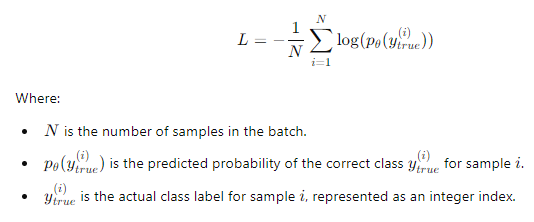



7 commonly used loss functions article link: https://builtin.com/machine-learning/common-loss-functions

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.3406 - loss: 1.7746 - val_accuracy: 0.5446 - val_loss: 1.2771
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.5635 - loss: 1.2326 - val_accuracy: 0.6190 - val_loss: 1.0662
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6378 - loss: 1.0346 - val_accuracy: 0.6481 - val_loss: 1.0033
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6752 - loss: 0.9246 - val_accuracy: 0.6691 - val_loss: 0.9471
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7069 - loss: 0.8405 - val_accuracy: 0.6609 - val_loss: 0.9693
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7287 - loss: 0.7839 - val_accuracy: 0.6881 - val_loss: 0.8888
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7408 - loss: 0.7329 - val_accuracy: 0.7000 - val_loss: 0.8750
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7642 - loss: 0.67

313/313 - 3s - 11ms/step - accuracy: 0.7021 - loss: 0.9188
0.7020999789237976


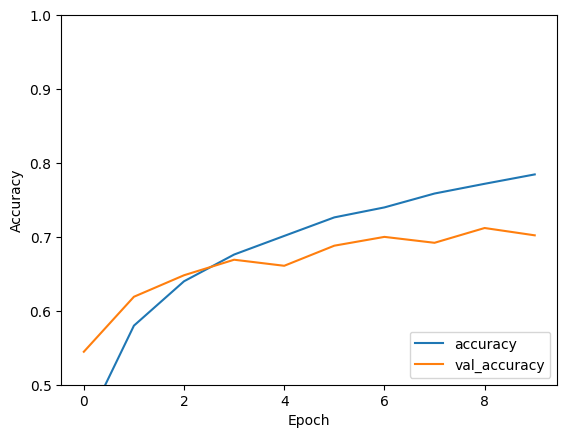

In [7]:
#evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

##Evaluating the model

## Confusion Matrix
A confusion matrix is a table used to evaluate the performance of a classification model. It is particularly useful in analyzing how well a model has predicted the classes for a multi-class or binary classification problem by comparing the predicted labels with the actual labels.**bold text**


In [10]:
import numpy as np
y_pred = np.argmax(model.predict(test_images), axis=-1) #generating class predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


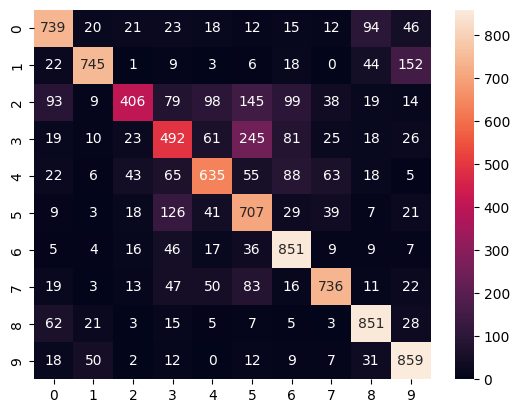

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.86      0.74      0.80      1000
           2       0.74      0.41      0.53      1000
           3       0.54      0.49      0.51      1000
           4       0.68      0.64      0.66      1000
           5       0.54      0.71      0.61      1000
           6       0.70      0.85      0.77      1000
           7       0.79      0.74      0.76      1000
           8       0.77      0.85      0.81      1000
           9       0.73      0.86      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [12]:
#importing necessary libraries for model evaluation and graphical
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd')
plt.show()
print(metrics.classification_report(test_labels, y_pred))